In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x = np.random.rand(100)

In [3]:
x[:5]

array([ 0.8704174 ,  0.55445303,  0.72827643,  0.83121293,  0.61022448])

In [4]:
x = x*10

In [5]:
x[:5]

array([ 8.70417398,  5.54453035,  7.28276433,  8.31212934,  6.10224485])

In [6]:
x.shape

(100,)

In [7]:
X = x.reshape(-1,1)

In [8]:
X.shape

(100, 1)

In [9]:
X[:5]

array([[ 8.70417398],
       [ 5.54453035],
       [ 7.28276433],
       [ 8.31212934],
       [ 6.10224485]])

In [10]:
# y as 3x with some noise

In [11]:
y = 3*x+np.random.randn(100)

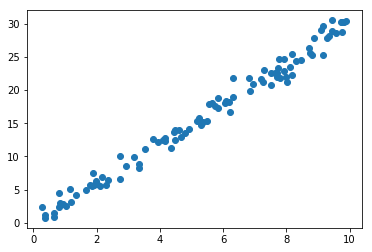

In [12]:
plt.scatter(x,y)

In [13]:
np.mean(x)

5.3903710805507759

In [14]:
np.std(x)

2.9144261889861798

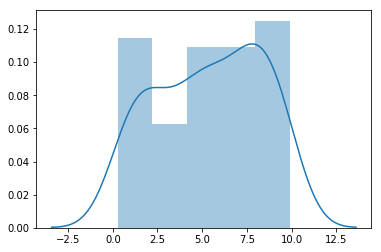

In [15]:
sns.distplot(x)

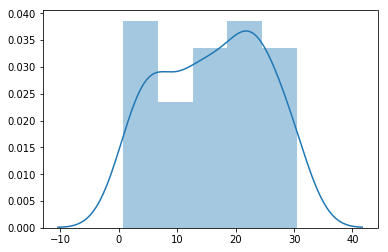

In [16]:
sns.distplot(y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regressor.intercept_ # close to zero since our random variable is between 0 to 1

-0.028037619900842969

In [23]:
regressor.coef_ # close to 3 since y is 3x with some noise

array([ 2.98796045])

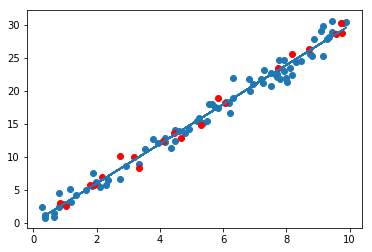

In [24]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test,c='red')
plt.plot(X_train,regressor.predict(X_train))

In [25]:
regressor.score(X_test,y_test)

0.9906950770561761

In [26]:
pd.DataFrame(data=np.array([regressor.predict(X_test),y_test]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.923746,6.426643,17.453832,13.893623,18.051501,5.313918,8.129493,28.600588,5.720960,23.129745,28.991747,29.133168,2.456427,13.305782,9.494716,25.979690,24.378224,15.780072,3.073680,12.270321
1,8.265115,6.905086,18.826917,12.851175,18.090910,5.700498,10.036543,28.604599,5.747544,23.352424,30.197793,28.677441,2.951793,13.618516,9.914304,26.277877,25.506085,14.743757,2.551675,12.424277


# Evaluating Model Perfomance

## 1. Residual Analysis

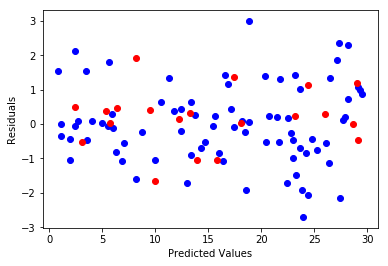

In [40]:
plt.scatter(regressor.predict(X_train),y_train-regressor.predict(X_train),c='blue')
plt.scatter(regressor.predict(X_test),y_test-regressor.predict(X_test),c='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')

(array([  2.,   6.,   6.,  16.,  18.,  12.,   6.,   9.,   4.,   1.]),
 array([-2.7129163 , -2.14158017, -1.57024405, -0.99890792, -0.4275718 ,
         0.14376433,  0.71510045,  1.28643658,  1.8577727 ,  2.42910883,
         3.00044495]),
 <a list of 10 Patch objects>)

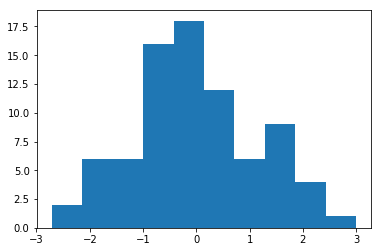

In [42]:
plt.hist(y_train-regressor.predict(X_train))

(array([ 1.,  2.,  0.,  2.,  3.,  7.,  1.,  1.,  2.,  1.]),
 array([-1.65863039, -1.30206233, -0.94549427, -0.58892621, -0.23235815,
         0.12420991,  0.48077797,  0.83734604,  1.1939141 ,  1.55048216,
         1.90705022]),
 <a list of 10 Patch objects>)

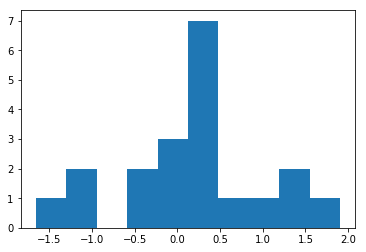

In [43]:
plt.hist(y_test-regressor.predict(X_test))

## 2. Mean squared error

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_train,regressor.predict(X_train))

1.2825111280610322

In [48]:
mean_squared_error(y_test,regressor.predict(X_test))

0.73513861066012354

## 3. R^2

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_train,regressor.predict(X_train))

0.98324055718485792

In [52]:
regressor.score(X_train,y_train)

0.98324055718485792

In [53]:
r2_score(y_test,regressor.predict(X_test))

0.9906950770561761

In [54]:
regressor.score(X_test,y_test)

0.9906950770561761